In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
house_path = '/content/Housing.csv'

In [4]:
data = pd.read_csv(house_path)

*   напишіть функцію гіпотези лінійної регресії у векторному вигляді:

$$h(w⃗, X) = Xw⃗$$


*  X - матриця даних, 
*  w⃗ - вектор параметрів.

In [252]:
def hypothesis(X,theta):
    # x - entire array (m,n+1)
    # theta - np.array(n+1,1) -> theta = np.ones(n)
    # h(x) = X * theta: The number of column of the first factor must be the same of the number of the row in the second factor.
    return np.dot(X, theta)



*   створіть функцію для обчислення функції втрат у векторному вигляді:

$$J(w⃗) = 1/2m * ∑(h(w⃗, xi) - yi)^2$$


*   m - кількість прикладів, 
*   xi - i-й приклад
*   yi - правильна відповідь для i-го прикладу

In [207]:
def loss_function(X, y, theta):
    # print('X shape:', X.shape)
    # print('theta shape:', theta.shape)
    m = len(y)
    J = 1/(2*m) * np.sum((X@theta - y)**2)
    return J



*   реалізуйте один крок градієнтного спуску:

$$∇J(w⃗) = 1/m * X.T * (h(w⃗, X) - y)$$
  - X - matrix (m, n+1),
  - y - vector of correct values (m, 1).
$$w⃗ := w⃗ - alpha * ∇J(w⃗)$$
- alpha = learning rate





In [7]:
import time

start_time = time.time()
def gradient_descent_step(X, y, theta, alpha=0.001):

    m = len(y) #number of training examples
    h = hypothesis(X, theta)
    gradient = (1/m) * np.dot(X.T, (h - y))
    theta = theta - alpha * gradient

    return theta

print('Time Taken For Gradient Descent Step in Sec:',time.time() - start_time)

Time Taken For Gradient Descent Step in Sec: 0.000225067138671875


In [56]:
def gradient_descent(X, y, theta, lr=0.0005, num_iterations=100000):
    
    m = len(y)
    cost_list = []

    for i in range(int(num_iterations)):
    
      theta = theta - lr*(1/m)*np.transpose(X)@(X@theta - y)
            
      cost_val = cost(X, y, theta)
      cost_list.append(cost_val)

    return theta, cost_list



*   знайдіть найкращі параметри 
w
⃗
w
  для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень:



In [57]:
def normalization(data):

  mean = np.mean(data)
  value_range = np.max(data) - np.min(data)

  result = []

  for x in data:
    norm_x = (x-mean)/value_range
    result.append(norm_x)

  return result

In [263]:
norm_df = data.copy()
norm_df = pd.DataFrame()

In [264]:
norm_df['price'] = normalization(data.price)
norm_df['area'] = normalization(data.area)
norm_df['bedrooms'] = normalization(data.bedrooms)
norm_df['bathrooms'] = normalization(data.bathrooms)

In [265]:
norm_df.head(2)

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587


In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

science_data = norm_df.iloc[:, 0:4]
x = science_data[['area', 'bedrooms', 'bathrooms']]
y = science_data['price']

reg = LinearRegression().fit(x, y)

reg.coef_
y_predicted = reg.predict(x)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted) 

print('Coeficient:', reg.coef_)
print('Slope:', reg.coef_)
print('Intercept:', reg.intercept_)
print('R-squared score is: ', r2)

Coeficient: [0.47714269 0.17611257 0.36001286]
Slope: [0.47714269 0.17611257 0.36001286]
Intercept: 7.014204135081996e-17
R-squared score is:  0.4870830667058762


Coefficient of Determination(R² score) explains how much the total variance of the dependent variable can be reduced by using the least square regression.

- We reduced the prediction error by ~ 48% by using regression.







In [208]:
theta = np.append(reg.intercept_, reg.coef_)
theta = theta.reshape(-1, 1) # to reshape theta to (1,4)
print('Loss function value is: ', loss_function(x, y, theta.T)) # to transpose theta to (4,1)

Loss function value is:  0.04357160863812754


In [255]:
X = np.hstack((np.ones((x.shape[0], 1)), x))

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
analytical_loss = loss_function(X, y, theta_best)

print(f"The best w⃗ - vector parameters based on analytical approach: \n {theta_best}")

print(f"The analytical loss: \n {analytical_loss}")

The best w⃗ - vector parameters based on analytical approach: 
 [[4.07182721e-17]
 [5.81968373e-01]]
The analytical loss: 
 0.00932839114027345


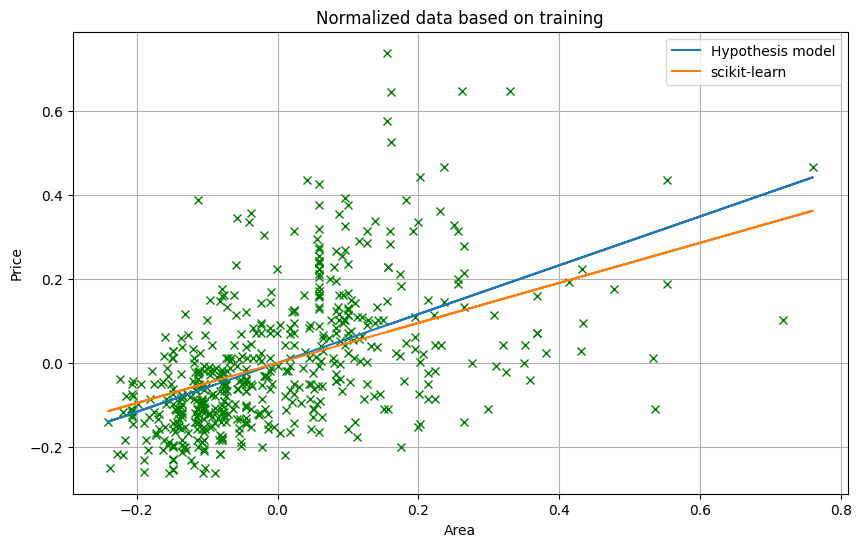

In [254]:
plt.figure(figsize=(10,6))

x = science_data['area'].values.reshape(-1, 1)
y = science_data['price'].values.reshape(-1, 1)

plt.plot(x, y, 'gx')

x_shaped = np.hstack((np.ones((x.shape[0], 1)), x))

theta_best = np.linalg.inv(x_shaped.T.dot(x_shaped)).dot(x_shaped.T).dot(y)

plt.plot(x, hypothesis(x_shaped, theta_best), label='Hypothesis model')
plt.plot(x, hypothesis(x_shaped, np.array([reg.intercept_, reg.coef_[0]])), label='scikit-learn')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Normalized data based on training')
plt.grid()
plt.legend()

plt.show()


In [258]:
original_loss = loss_function(x, y, theta.T)
analytical_loss = loss_function(X, y, theta_best)

difference = original_loss - analytical_loss

print('The original loss function was: \n', original_loss)
print('The analytical loss was: \n', analytical_loss)
print('The difference is: \n', difference)

The original loss function was: 
 0.04357160863812754
The analytical loss was: 
 0.00932839114027345
The difference is: 
 0.03424321749785409
